# **Match Song Lyrics to Artists**

In this assignment, you are asked to match song lyrics to their respective artists. Steps to the assignment:
1. Download the song lyrics. You can download the data from this link: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data
1. Preprocess your dataset to your liking. You are free to use any preprocessing with any libraries. Make sure to apply the preprocessing to the whole dataset, even the test part.
1. Split your dataset into train/dev/test sets with 0.70/0.15/0.15 proportions. Select a random state number and use it consistently to get the same sets while iterating. **This is very important!**
1. Select your features for the task: word n-grams (unigram, bigram, trigram), character n-grams, TF-IDF, and so on.
1. Use three different approaches to solve the task: Some examples are Naive Bayes, Logistic Regression, SVM, KNNs, and neural networks classification methods with the dataset. **You need to select Naive Bayes as one of the methods and code Naive Bayes with the MLE approach from scratch.**
1. Compare different classification methods and show confusion matrices for each method.
1. Write a small report on your approaches and results.


## Rules
### Allowed:
 - Use any libraries for preprocessing, feature selection, vector making, training, and predicting for the task, **other than the Naive Bayes classifier**.
 - Adding additional coding blocks
 - Use spaCy for Named Entity Recognition and Part-of-Speech tagging (next week's content but will be helpful for this assignment)

### Not allowed:
 - Using metadata in the dataset given. You must use **only** the lyrics of the song. For example, do not use the release year to assign authorship.
 - **You need to write your own Naive Bayes classifier.** Using the Naive Bayes classifier from an external library is not allowed.
 - Running your code with the test split of your data. You can run this just before you submit your system. We will run your system on your test data in the evaluation.
 - Changing the contents of the evaluation block at the end of the notebook.

## Assignment Report
Please write a short assignment report at the end of the notebook (max 500 words). Please include all of the following points in the report:
 - Preprocessing method
 - Selection of the features and the reasoning for the selections
 - Selection of the classification methods and the reasoning for the selection
 - Challenges you have faced while writing the tokenizer and challenges with the specific corpus
 - Limitations of your approach
 - Possible improvements to the system

## Grading
You will be graded with the following criteria:
 - running complete code (0.5),
 - clear commenting (0.5),
 - data loading and concatenation (0.5),
 - exploratory data analysis (EDA) - Artist Histogram Plot (0.5)
 - preprocessing function (0.5)
 - naive bayes implementation (1)
 - feature engineering (1)
 - model training and evaluation for at least 3 classification methods (including naive bayes) (1.5)
 - confusion matrix for each method (0.5)
 - assignment report (1).

Total points for this assignment = 7.5

You can get bonus points (maximum 0.5) by trying neural networks as one of the classifiers.

## Submission

Submission will be made to SUCourse. Please submit your file using the following naming convention.


`studentid_studentname_tokenizer.ipynb  - ex. 26744_aysegulrana_tokenizer.ipynb`


**Deadline is November 14nd, 23.55pm.**

### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [1]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.

import zipfile
import pandas as pd


# Define the path to your zip file
zip_file_path = '/Users/efeguclu/Desktop/3.2/CS 445/archive.zip'

# Initialize an empty list to hold each file's DataFrame
dfs = []

# Open and read only CSV files in the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    for file_name in zip_file.namelist():
        if file_name.endswith('.csv'):
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)





In [2]:
df.head()

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN


In [3]:
len(df)

6027

### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [4]:
#### WRITE YOUR CODE HERE
# Check for duplicate lyrics
print("Original DataFrame length:", len(df))
df = df.drop_duplicates(subset="Lyric")  # Remove duplicate lyrics

# Drop rows with empty or null lyrics
df = df.dropna(subset=["Lyric"])
df = df[df["Lyric"].str.strip() != ""]  # Remove rows where lyrics are empty strings

# Check the DataFrame length after cleaning
print("Cleaned DataFrame length:", len(df))
# Keep only the columns needed for authorship identification
df = df[['Artist', 'Lyric']]

# Display the first few rows to verify the change
df.head()



Original DataFrame length: 6027
Cleaned DataFrame length: 5640


,Artist,Lyric
0,Ariana Grande,thought i'd end up with sean but he wasn't a m...
1,Ariana Grande,yeah breakfast at tiffany's and bottles of bub...
2,Ariana Grande,you you love it how i move you you love it how...
3,Ariana Grande,ariana grande nicki minaj i've been here all ...
4,Ariana Grande,right now i'm in a state of mind i wanna be in...


### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

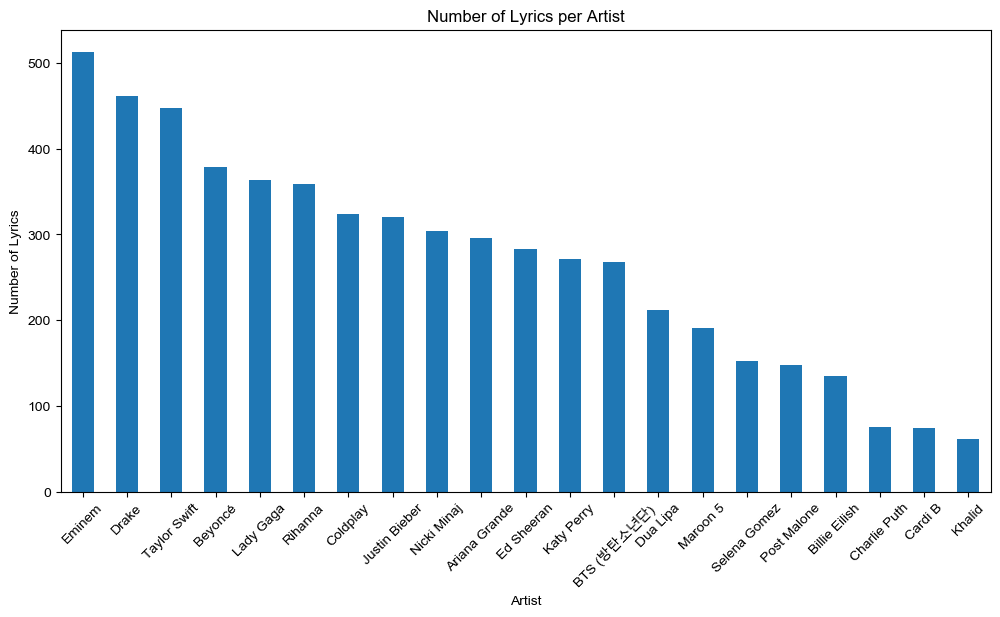

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set a font that supports Unicode characters 
plt.rcParams['font.family'] = 'Arial Unicode MS'  # Change to a font that supports your characters

# Plot histogram for the number of lyrics per artist
plt.figure(figsize=(12, 6))
df['Artist'].value_counts().plot(kind='bar')
plt.title('Number of Lyrics per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Lyrics')
plt.xticks(rotation=45)
plt.show()


### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


    

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [7]:

import numpy as np
from tqdm import tqdm



def preprocess_data(data, sample_size=None):
    """
    Optimized preprocessing function for song lyrics with contractions handling
    """
    # Contractions mapping
    contractions = {
        "ain't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "i would",
        "i'll": "i will",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what's": "what is",
        "where's": "where is",
        "who's": "who is",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have",
        "gonna": "going to",
        "wanna": "want to",
        "gotta": "got to",
        "ima": "i am going to",
        "imma": "i am going to"
    }
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Get stopwords but keep important ones for songs
    stop_words = set(stopwords.words('english'))
    keep_words = {'my', 'me', 'mine', 'you', 'your', 'yours', 'we', 'our', 'ours', 
                 'they', 'their', 'theirs', 'am', 'is', 'are', 'was', 'were', 'no', 'not'}
    stop_words = stop_words - keep_words

    def clean_text(text):
        if pd.isna(text):
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Replace contractions
        for contraction, expansion in contractions.items():
            text = text.replace(contraction, expansion)
        
        # Remove parentheses and brackets content
        text = re.sub(r'\([^)]*\)|\[[^]]*\]', '', text)
        
        # Remove repeated characters
        text = re.sub(r'(.)\1{2,}', r'\1\1', text)
        
        # Remove special characters except apostrophes
        text = re.sub(r"[^a-zA-Z0-9' ]", ' ', text)
        
        # Tokenize
        words = word_tokenize(text)
        
        # Remove stopwords and apply lemmatization with POS tagging
        words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
                for word in words 
                if word not in stop_words and len(word) > 1]
        
        return ' '.join(words)
    
    # Create a copy of the input data
    processed_data = data.copy()
    
    # Option to use a sample for testing
    if sample_size:
        processed_data = processed_data.sample(n=sample_size, random_state=42)
    
    # Apply the cleaning function with progress bar
    tqdm.pandas(desc="Preprocessing lyrics")
    processed_data['processed_lyrics'] = processed_data['Lyric'].progress_apply(clean_text)
    
    # Remove empty strings
    processed_data = processed_data[processed_data['processed_lyrics'].str.strip() != '']
    
    return processed_data

# Apply preprocessing with progress bar
print("Starting preprocessing...")
df_processed = preprocess_data(df)

# Analysis of results
print("\nPreprocessing Analysis:")
print("------------------------")
print(f"Original number of samples: {len(df)}")
print(f"Preprocessed number of samples: {len(df_processed)}")

# Show example comparisons
print("\nExample Comparisons (Before vs After Preprocessing):")
print("---------------------------------------------------")
for i in range(3):
    idx = df_processed.index[i]
    print(f"\nExample {i+1}:")
    print(f"Before: {df.loc[idx, 'Lyric'][:200]}...")
    print(f"After:  {df_processed.loc[idx, 'processed_lyrics'][:200]}...")

# Calculate average word lengths
avg_words_before = df['Lyric'].str.split().str.len().mean()
avg_words_after = df_processed['processed_lyrics'].str.split().str.len().mean()

print("\nWord Count Analysis:")
print("-------------------")
print(f"Average words per lyric before preprocessing: {avg_words_before:.2f}")
print(f"Average words per lyric after preprocessing: {avg_words_after:.2f}")

# Get vocabulary sizes
vocab_before = set(' '.join(df['Lyric'].astype(str)).split())
vocab_after = set(' '.join(df_processed['processed_lyrics'].astype(str)).split())

print("\nVocabulary Analysis:")
print("-------------------")
print(f"Vocabulary size before preprocessing: {len(vocab_before)}")
print(f"Vocabulary size after preprocessing: {len(vocab_after)}")

# Store the processed DataFrame
df = df_processed.copy()

Starting preprocessing...


Preprocessing lyrics: 100%|█████████████████| 5640/5640 [01:06<00:00, 84.24it/s]



Preprocessing Analysis:
------------------------
Original number of samples: 5640
Preprocessed number of samples: 5637

Example Comparisons (Before vs After Preprocessing):
---------------------------------------------------

Example 1:
Before: thought i'd end up with sean but he wasn't a match wrote some songs about ricky now i listen and laugh even almost got married and for pete i'm so thankful wish i could say thank you to malcolm 'cause...
After:  thought would end sean be not match write song ricky listen laugh even almost get married pete be thankful wish could say thank you malcolm 'cause be angel pre one taught me love one taught me patienc...

Example 2:
Before: yeah breakfast at tiffany's and bottles of bubbles girls with tattoos who like getting in trouble lashes and diamonds atm machines buy myself all of my favorite things yeah been through some bad shit ...
After:  yeah breakfast tiffany 's bottle bubble girl tattoo like get trouble lash diamond atm machine buy my favor

In [8]:
df.head()

,Artist,Lyric,processed_lyrics
0,Ariana Grande,thought i'd end up with sean but he wasn't a m...,thought would end sean be not match write song...
1,Ariana Grande,yeah breakfast at tiffany's and bottles of bub...,yeah breakfast tiffany 's bottle bubble girl t...
2,Ariana Grande,you you love it how i move you you love it how...,you you love move you you love touch you my on...
3,Ariana Grande,ariana grande nicki minaj i've been here all ...,ariana grande nicki minaj night ariana day nic...
4,Ariana Grande,right now i'm in a state of mind i wanna be in...,right be state mind want like time be not get ...


#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [9]:
from sklearn.model_selection import train_test_split

# First, create X (features) and y (labels)
X = df['processed_lyrics']
y = df['Artist']

# First split: Separate test set (15% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,  # 15% for test
    random_state=42,  # for reproducibility
    stratify=y  # maintain label distribution
)

# Second split: Split remaining data into train (82.35%) and dev (17.65%)
# 82.35% of 85% ≈ 70% of total
# 17.65% of 85% ≈ 15% of total
X_train, X_dev, y_train, y_dev = train_test_split(
    X_temp, y_temp,
    test_size=0.1765,  # 17.65% of remaining data
    random_state=42,
    stratify=y_temp
)

# Print the split sizes to verify proportions
print("Dataset Split Sizes:")
print(f"Total samples: {len(X)}")
print(f"Training set: {len(X_train)} ({len(X_train)/len(X):.2%})")
print(f"Development set: {len(X_dev)} ({len(X_dev)/len(X):.2%})")
print(f"Test set: {len(X_test)} ({len(X_test)/len(X):.2%})")

# Check class distribution in each split
print("\nClass Distribution:")
print("\nTraining set:")
print(y_train.value_counts(normalize=True).head())
print("\nDevelopment set:")
print(y_dev.value_counts(normalize=True).head())
print("\nTest set:")
print(y_test.value_counts(normalize=True).head())

# Save splits for later use
train_data = pd.DataFrame({'processed_lyrics': X_train, 'Artist': y_train})
dev_data = pd.DataFrame({'processed_lyrics': X_dev, 'Artist': y_dev})
test_data = pd.DataFrame({'processed_lyrics': X_test, 'Artist': y_test})

Dataset Split Sizes:
Total samples: 5637
Training set: 3945 (69.98%)
Development set: 846 (15.01%)
Test set: 846 (15.01%)

Class Distribution:

Training set:
Artist
Eminem          0.090494
Drake           0.081876
Taylor Swift    0.079594
Beyoncé         0.067174
Lady Gaga       0.064385
Name: proportion, dtype: float64

Development set:
Artist
Eminem          0.091017
Drake           0.081560
Taylor Swift    0.079196
Beyoncé         0.067376
Lady Gaga       0.065012
Name: proportion, dtype: float64

Test set:
Artist
Eminem          0.091017
Drake           0.081560
Taylor Swift    0.079196
Beyoncé         0.067376
Lady Gaga       0.065012
Name: proportion, dtype: float64


### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [10]:
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# 1. First create TF-IDF features
#Using TfidfVectorizer to transform text data into a numerical format for machine learning.
print("Creating TF-IDF features...")
tfidf = TfidfVectorizer(
    max_features=7500, #limt vocab to the top 7500 words
    ngram_range=(1, 3), #include unigramsi bigrams, and trigrams
    min_df=3,  #ignore if it appears fewer than 3 doc
    max_df=0.90, # Ignore terms that appear in more than 90% of documents
    sublinear_tf=True,  # Apply sublinear scaling
)

# Fit the TF-IDF on the training data and apply it to the development and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_dev_tfidf = tfidf.transform(X_dev)
X_test_tfidf = tfidf.transform(X_test)

# Add after TF-IDF
selector = SelectKBest(chi2, k=3000)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_dev_selected = selector.transform(X_dev_tfidf)



# Display the shapes of each set after TF-IDF and feature selection

print("Feature Extraction Summary:")
print(f"Training set shape: {X_train_tfidf.shape}")
print(f"Development set shape: {X_dev_tfidf.shape}")
print(f"Test set shape: {X_test_tfidf.shape}")




Creating TF-IDF features...
Feature Extraction Summary:
Training set shape: (3945, 7500)
Development set shape: (846, 7500)
Test set shape: (846, 7500)


In [11]:
# 2. Now implement and train Naive Bayes
class CustomNaiveBayes:
    def __init__(self, alpha=0.05,class_weight='balanced'):
        # Initialize smoothing parameter alpha and other attributes for the model
        self.alpha = alpha
        self.class_weight= class_weight
        self.classes = None
        self.feature_count = None
        self.class_count = None
        self.class_priors = None
        self.vocab_size = None
        self.feature_names = None
        
    def fit(self, X: csr_matrix, y, feature_names=None):
        """
        Enhanced fit method with improved probability estimation
        """
        # Identify the unique class labels

        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        self.vocab_size = n_features
        self.feature_names = feature_names
        
        # Initialize arrays for feature and class counts
        self.feature_count = np.zeros((len(self.classes), n_features))
        self.class_count = np.zeros(len(self.classes))
        
        # Count occurrences of each feature for each class
        for i, class_label in enumerate(self.classes):
            X_class = X[y == class_label]
            # Use log-scale for better numerical stability
            self.feature_count[i, :] = X_class.sum(axis=0).A1 + self.alpha
            self.class_count[i] = X_class.shape[0]
        
        # Calculate class priors
        total_docs = np.sum(self.class_count)
        self.class_priors = (self.class_count + self.alpha) / (total_docs + self.alpha * len(self.classes))
        
        # Convert feature counts to log probabilities
        feature_sums = self.feature_count.sum(axis=1)
        self.feature_count = np.log(self.feature_count) - np.log(feature_sums[:, np.newaxis])
        
        return self
    
    def predict_proba(self, X):
        """
        Enhanced probability prediction with improved numerical stability
        """
        log_probs = np.zeros((X.shape[0], len(self.classes)))
        
        # Use log probabilities throughout
        for i, class_label in enumerate(self.classes):
            log_probs[:, i] = np.log(self.class_priors[i])
            log_probs[:, i] += X.multiply(self.feature_count[i, :]).sum(axis=1).A1
        
        # Normalize log probabilities
        log_probs_normalized = log_probs - log_probs.max(axis=1)[:, np.newaxis]
        probs = np.exp(log_probs_normalized)
        probs /= probs.sum(axis=1)[:, np.newaxis]
        
        return probs
    
    def predict(self, X):
        """
        Predict class labels
        """
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]
    
    def get_top_features(self, class_idx, n=10):
        """
        Get top discriminative features for a class
        """
        if self.feature_names is None:
            return []
        
        feature_scores = self.feature_count[class_idx, :]
        top_indices = np.argsort(feature_scores)[-n:][::-1]
        return [(self.feature_names[i], feature_scores[i]) for i in top_indices]


In [12]:
# 3. Train and evaluate
print("\nTraining improved Naive Bayes classifier...")
improved_nb = CustomNaiveBayes(alpha=0.05)
improved_nb.fit(X_train_tfidf, y_train, tfidf.get_feature_names_out())

# Predict the labels for the development set
y_pred_dev = improved_nb.predict(X_dev_tfidf)
accuracy = np.mean(y_pred_dev == y_dev)

# Display the accuracy and classification report
print(f"\nImproved Development Set Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_dev, y_pred_dev))



Training improved Naive Bayes classifier...

Improved Development Set Accuracy: 0.6891

Classification Report:
               precision    recall  f1-score   support

Ariana Grande       0.60      0.66      0.63        44
  BTS (방탄소년단)       0.86      0.78      0.82        40
      Beyoncé       0.54      0.53      0.53        57
Billie Eilish       1.00      0.60      0.75        20
      Cardi B       1.00      0.36      0.53        11
 Charlie Puth       1.00      0.27      0.43        11
     Coldplay       0.74      0.71      0.73        49
        Drake       0.61      0.84      0.71        69
     Dua Lipa       0.89      0.75      0.81        32
   Ed Sheeran       0.68      0.60      0.63        42
       Eminem       0.70      0.94      0.80        77
Justin Bieber       0.57      0.65      0.61        48
   Katy Perry       0.81      0.61      0.69        41
       Khalid       1.00      0.44      0.62         9
    Lady Gaga       0.83      0.53      0.64        55
     Ma

In [13]:
# Show top features for some artists (example: Eminem, Taylor Swift, Drake)
for artist in ['Eminem', 'Taylor Swift', 'Drake']:
    if artist in improved_nb.classes:  # Check if artist exists in the dataset
        class_idx = np.where(improved_nb.classes == artist)[0][0]
        print(f"\nTop features for {artist}:")
        top_features = improved_nb.get_top_features(class_idx, n=5)
        for feature, score in top_features:
            print(f"{feature}: {np.exp(score):.4f}")



Top features for Eminem:
eminem: 0.0039
fuck: 0.0030
get: 0.0028
not: 0.0028
shit: 0.0027

Top features for Taylor Swift:
me: 0.0035
not: 0.0034
my: 0.0031
your: 0.0028
you be: 0.0028

Top features for Drake:
drake: 0.0053
nigga: 0.0040
get: 0.0033
not: 0.0033
they: 0.0033


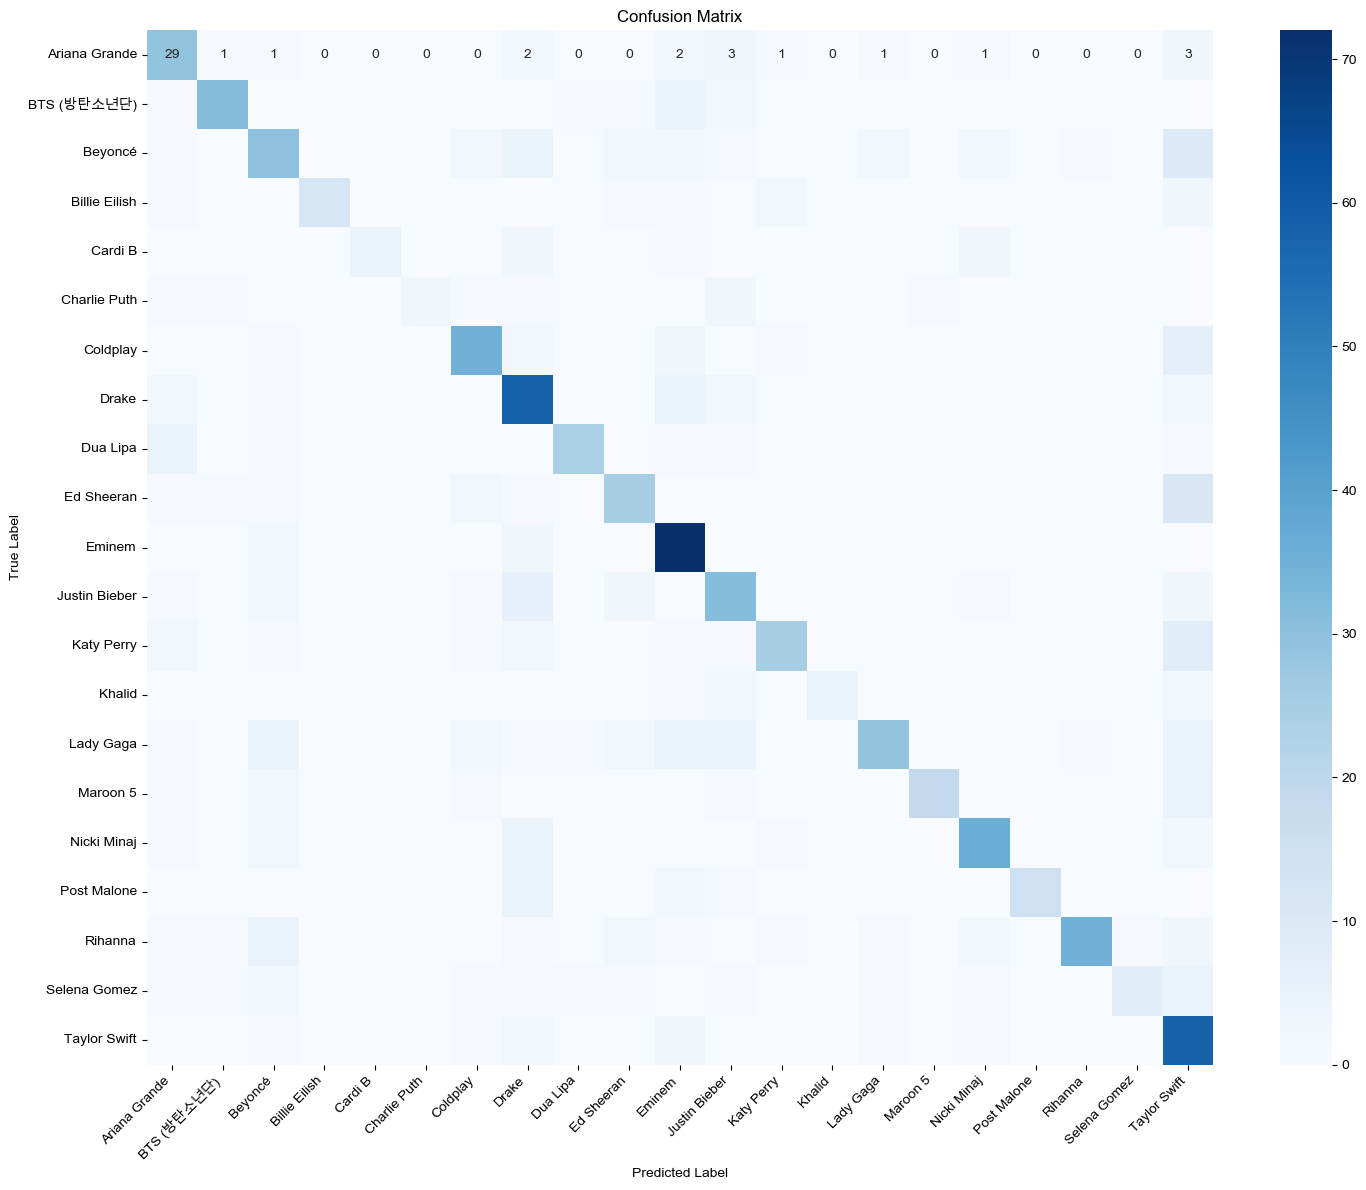

In [14]:
# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(confusion_matrix(y_dev, y_pred_dev), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=improved_nb.classes,
            yticklabels=improved_nb.classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

Performing Chi-Square Feature Selection...


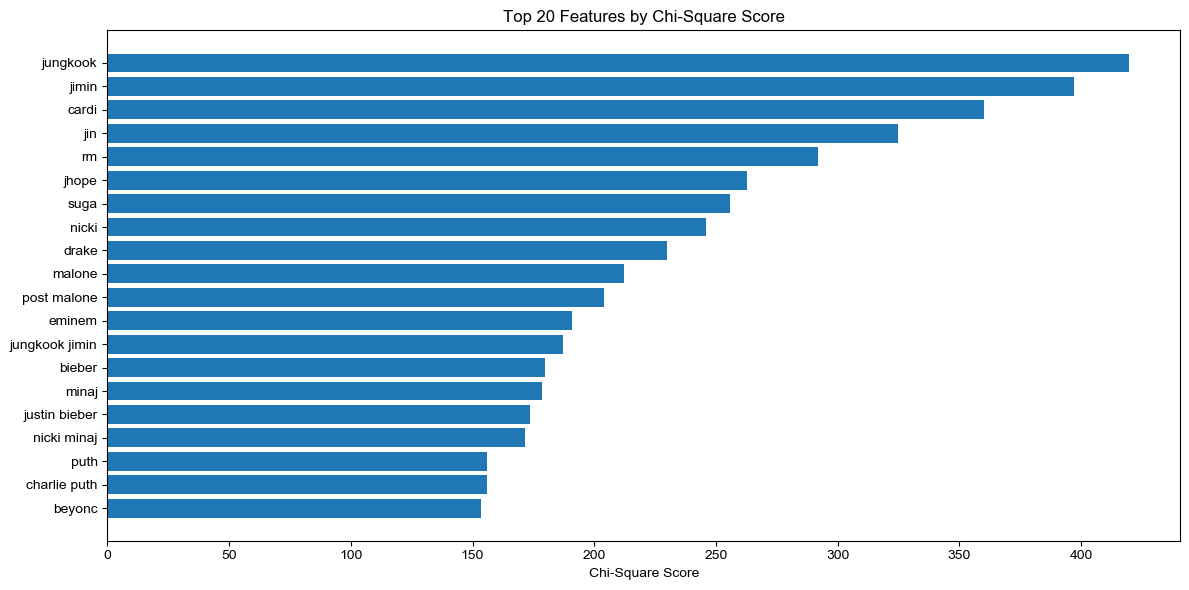

In [15]:
#### WRITE YOUR CODE HERE
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from scipy.sparse import hstack

# 1. Chi-Square Feature Selection
# Using chi-square test to select features that are highly relevant for classification
print("Performing Chi-Square Feature Selection...")
chi2_selector = SelectKBest(chi2, k=7500)
X_train_chi2 = chi2_selector.fit_transform(X_train_tfidf, y_train)
X_dev_chi2 = chi2_selector.transform(X_dev_tfidf)

# Get chi-square scores for selected features
chi2_scores = chi2_selector.scores_
selected_features_mask = chi2_selector.get_support()
selected_features = np.array(tfidf.get_feature_names_out())[selected_features_mask]

# Plotting the top 20 features by chi-square score
plt.figure(figsize=(12, 6))
top_k = 20
top_indices = np.argsort(chi2_scores[selected_features_mask])[-top_k:]
plt.barh(range(top_k), chi2_scores[selected_features_mask][top_indices])
plt.yticks(range(top_k), selected_features[top_indices])
plt.title('Top 20 Features by Chi-Square Score')
plt.xlabel('Chi-Square Score')
plt.tight_layout()
plt.show()








Performing LSA...


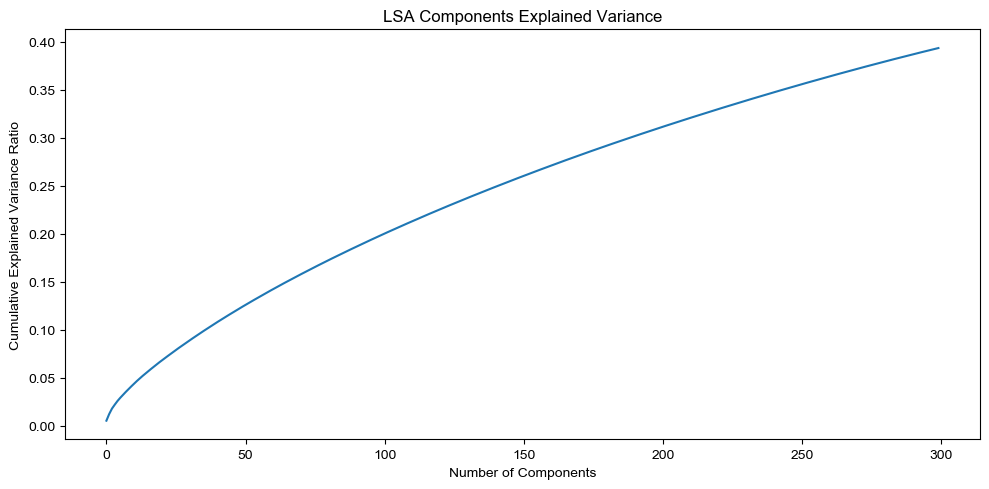

In [16]:
# 2. LSA (Latent Semantic Analysis)
# Applying LSA to reduce feature dimensionality while preserving relationships between words
print("\nPerforming LSA...")
n_components = 300
lsa = TruncatedSVD(n_components=n_components, random_state=42)
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_dev_lsa = lsa.transform(X_dev_tfidf)

# Plot cumulative explained variance to see how many components capture most of the variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('LSA Components Explained Variance')
plt.tight_layout()
plt.show()


In [17]:
# 3. Additional Features
def extract_additional_features(texts):
    features = []
    for text in texts:
        # Calculate various text statistics
        word_count = len(text.split())
        avg_word_length = np.mean([len(word) for word in text.split()])
        unique_words = len(set(text.split()))
        
        # Count occurrences of specific punctuation marks
        exclamation_count = text.count('!')
        question_count = text.count('?')
        
        # Calculate ratio of unique words to total words
        unique_ratio = unique_words / word_count if word_count > 0 else 0
        
        features.append([
            word_count,
            avg_word_length,
            unique_words,
            unique_ratio,
            exclamation_count,
            question_count
        ])
    return np.array(features)

# Extract additional features for both training and development sets
print("\nExtracting additional features...")
X_train_extra = extract_additional_features(X_train)
X_dev_extra = extract_additional_features(X_dev)



Extracting additional features...


In [18]:
# 4. Combine Different Feature Sets
# Normalize the LSA and additional features before combining
X_train_lsa_norm = normalize(X_train_lsa)
X_dev_lsa_norm = normalize(X_dev_lsa)

# Normalize the LSA and additional features before combining
X_train_extra_norm = normalize(X_train_extra)
X_dev_extra_norm = normalize(X_dev_extra)

# Combine normalized LSA features with additional features to create a comprehensive feature set
print("\nCreating combined feature sets...")
X_train_combined = np.hstack([X_train_lsa_norm, X_train_extra_norm])
X_dev_combined = np.hstack([X_dev_lsa_norm, X_dev_extra_norm])

# Display the shapes of each feature set
print("\nFeature Set Dimensions:")
print(f"Chi-Square Selected Features: {X_train_chi2.shape}")
print(f"LSA Features: {X_train_lsa.shape}")
print(f"Additional Features: {X_train_extra.shape}")
print(f"Combined Features: {X_train_combined.shape}")


Creating combined feature sets...

Feature Set Dimensions:
Chi-Square Selected Features: (3945, 7500)
LSA Features: (3945, 300)
Additional Features: (3945, 6)
Combined Features: (3945, 306)


In [19]:
# 5. Feature Importance Analysis
# Function to analyze top words contributing to each LSA component
def analyze_lsa_components(lsa, tfidf, n_top_words=10):
    feature_names = tfidf.get_feature_names_out()
    for i, comp in enumerate(lsa.components_[:5]):  # Look at first 5 components
        top_features = [feature_names[j] for j in comp.argsort()[:-n_top_words-1:-1]]
        print(f"\nTop {n_top_words} words for component {i + 1}:")
        print(", ".join(top_features))

print("\nAnalyzing LSA Components:")
analyze_lsa_components(lsa, tfidf)

# Save different feature sets for use with various classifiers
feature_sets = {
    'chi2': (X_train_chi2, X_dev_chi2),
    'lsa': (X_train_lsa_norm, X_dev_lsa_norm),
    'combined': (X_train_combined, X_dev_combined)
}

print("\nFeature sets prepared for classifier training.")


Analyzing LSA Components:

Top 10 words for component 1:
not, me, my, get, your, like, know, we, go, want

Top 10 words for component 2:
bitch, fuck, shit, nigga, they, em, money, nicki, eminem, man

Top 10 words for component 3:
jungkook, jimin, jin, rm, jhope, suga, jungkook jimin, jimin jungkook, jin jimin, jungkook jin

Top 10 words for component 4:
lyric, song, release, our, snippet, yet, lyric snippet, jungkook, would, jimin

Top 10 words for component 5:
lyric, release, snippet, lyric snippet, song, yet, yeah, baby, yeah yeah, boy

Feature sets prepared for classifier training.


In [20]:
# Example usage with LogisticRegression
from sklearn.linear_model import LogisticRegression

# Using LSA features
lr_lsa = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_lsa.fit(X_train_lsa_norm, y_train)
lr_lsa_acc = lr_lsa.score(X_dev_lsa_norm, y_dev)

# Using combined features
lr_combined = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_combined.fit(X_train_combined, y_train)
lr_combined_acc = lr_combined.score(X_dev_combined, y_dev)

print("\nLogistic Regression Results:")
print(f"LSA Features Accuracy: {lr_lsa_acc:.4f}")
print(f"Combined Features Accuracy: {lr_combined_acc:.4f}")


Logistic Regression Results:
LSA Features Accuracy: 0.6702
Combined Features Accuracy: 0.6738


### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.

In [21]:
#### WRITE YOUR CODE HERE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Step 1: Train and Evaluate Naive Bayes
# Using Multinomial Naive Bayes for text classification on the Chi-Square selected features

nb_model = MultinomialNB()
nb_model.fit(X_train_chi2, y_train) # Train the Naive Bayes model on the training data
nb_y_pred = nb_model.predict(X_dev_chi2) # Predict on the development set
nb_acc = accuracy_score(y_dev, nb_y_pred) # Calculate accuracy
nb_f1 = f1_score(y_dev, nb_y_pred, average='weighted') # Calculate F1 score, accounting for class imbalance

# Train and evaluate SVM
# Using a linear kernel for SVM on the combined feature set (LSA + additional features)
svm_model = SVC(kernel='linear', probability=True)  # Linear kernel for efficiency with text data
svm_model.fit(X_train_combined, y_train) # Train the SVM model
svm_y_pred = svm_model.predict(X_dev_combined)  # Predict on the development set
svm_acc = accuracy_score(y_dev, svm_y_pred) # Calculate accuracy for SVM
svm_f1 = f1_score(y_dev, svm_y_pred, average='weighted')# Calculate weighted F1 score

# Train and evaluate Logistic Regression   
# Using Logistic Regression with multinomial classification to handle multiple classes

lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000) # Multinomial for multi-class setting
lr_model.fit(X_train_combined, y_train) # Train the Logistic Regression model
lr_y_pred = lr_model.predict(X_dev_combined) # Predict on the development set
lr_acc = accuracy_score(y_dev, lr_y_pred)  # Calculate accuracy for Logistic Regression
lr_f1 = f1_score(y_dev, lr_y_pred, average='weighted') # Calculate weighted F1 score


print("Development Set Performance:")
print(f"Naive Bayes - Accuracy: {nb_acc:.4f}, F1 Score: {nb_f1:.4f}")
print(f"SVM - Accuracy: {svm_acc:.4f}, F1 Score: {svm_f1:.4f}")
print(f"Logistic Regression - Accuracy: {lr_acc:.4f}, F1 Score: {lr_f1:.4f}")


Development Set Performance:
Naive Bayes - Accuracy: 0.4870, F1 Score: 0.4727
SVM - Accuracy: 0.6820, F1 Score: 0.6807
Logistic Regression - Accuracy: 0.6738, F1 Score: 0.6675



Naive Bayes - Test Set Performance:
Accuracy: 0.5012, F1 Score: 0.4869


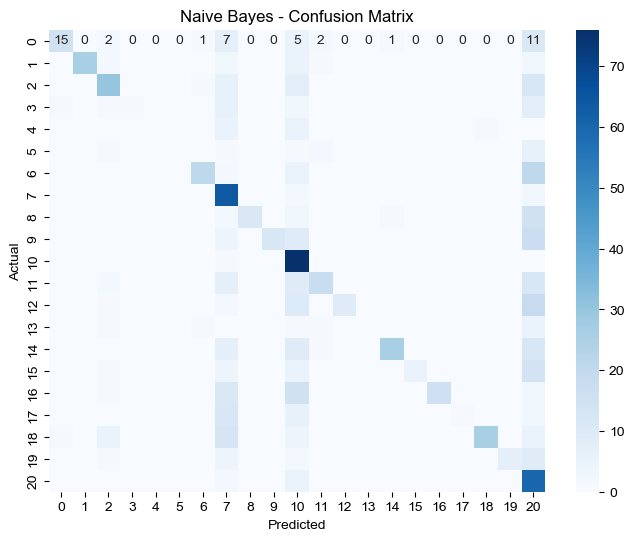


SVM - Test Set Performance:
Accuracy: 0.6643, F1 Score: 0.6583


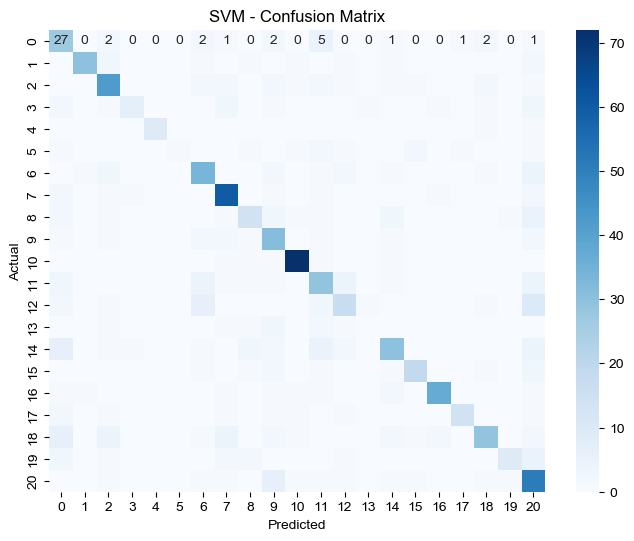


Logistic Regression - Test Set Performance:
Accuracy: 0.6619, F1 Score: 0.6552


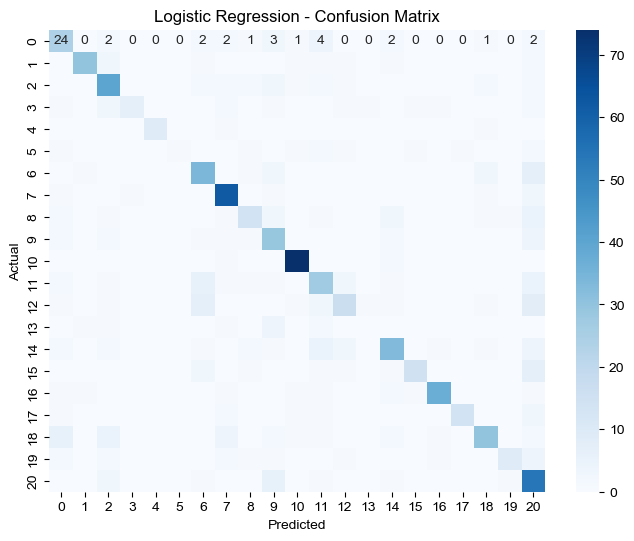

In [22]:
# Transform the test set with Chi-Square selector
X_test_chi2 = chi2_selector.transform(X_test_tfidf)

# Apply LSA and other additional features for the combined test set
X_test_lsa = lsa.transform(X_test_tfidf)
X_test_lsa_norm = normalize(X_test_lsa)

X_test_extra = extract_additional_features(X_test)  # Use the same function defined for extracting features
X_test_extra_norm = normalize(X_test_extra)

# Create combined feature set for the test set
X_test_combined = np.hstack([X_test_lsa_norm, X_test_extra_norm])

models = {'Naive Bayes': nb_model, 'SVM': svm_model, 'Logistic Regression': lr_model}
test_results = {}

for model_name, model in models.items():
    if model_name == 'Naive Bayes':
        y_pred = model.predict(X_test_chi2)
    else:
        y_pred = model.predict(X_test_combined)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    test_results[model_name] = {'accuracy': acc, 'f1_score': f1, 'confusion_matrix': cm}
    print(f"\n{model_name} - Test Set Performance:")
    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [23]:
print("\nSummary Report on Test Set Performance")
for model_name, metrics in test_results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}\n")



Summary Report on Test Set Performance
Naive Bayes:
  Accuracy: 0.5012
  F1 Score: 0.4869

SVM:
  Accuracy: 0.6643
  F1 Score: 0.6583

Logistic Regression:
  Accuracy: 0.6619
  F1 Score: 0.6552



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize Neural Network Model
# Creating a Multi-layer Perceptron (MLP) neural network with two hidden layers
# - The first hidden layer has 100 neurons
# - The second hidden layer has 50 neurons
# - Maximum 300 iterations to converge, with a fixed random state for reproducibility
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

# Step 2: Train the Neural Network Model
# Fitting the model on the combined feature set (LSA and additional features) for training
print("Training the Neural Network...")
nn_model.fit(X_train_combined, y_train)

# Step 3: Evaluate Model on Development Set
# Predicting labels on the development set and calculating accuracy and F1 score
y_dev_pred = nn_model.predict(X_dev_combined)  # Re-added this line for prediction
nn_dev_acc = accuracy_score(y_dev, y_dev_pred)  # Calculate accuracy on the development set
nn_dev_f1 = f1_score(y_dev, y_dev_pred, average='weighted')  # Calculate weighted F1 score
print(f"Development Set - Neural Network Accuracy: {nn_dev_acc:.4f}, F1 Score: {nn_dev_f1:.4f}")

# Step 4: Evaluate Model on Test Set
# Predicting labels on the test set to evaluate model performance on unseen data
y_test_pred = nn_model.predict(X_test_combined)  # Predict on the test set
nn_test_acc = accuracy_score(y_test, y_test_pred)  # Calculate accuracy on the test set
nn_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate weighted F1 score
print(f"Test Set - Neural Network Accuracy: {nn_test_acc:.4f}, F1 Score: {nn_test_f1:.4f}")

# Step 5: Confusion Matrix for the Test Set
# Generating and visualizing the confusion matrix to observe classification performance across classes
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training the Neural Network...


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert the class labels into integer values for neural network training
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)  # Fit and transform on training labels
y_dev_enc = label_encoder.transform(y_dev)          # Transform development labels
y_test_enc = label_encoder.transform(y_test)        # Transform test labels

# Define the neural network model using Keras
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_combined.shape[1],)),
    Dropout(0.3),  # Dropout layer to reduce overfitting
    Dense(256, activation='relu'),  # Second hidden layer with ReLU
    Dropout(0.3),  # Dropout layer to improve generalization
    Dense(len(set(y_train_enc)), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss for classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data, validate on the development set, with batch size of 32 for 10 epochs
history = model.fit(X_train_combined, y_train_enc, epochs=10, validation_data=(X_dev_combined, y_dev_enc), batch_size=32)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test_combined, y_test_enc, verbose=0)
print(f"Test Set - Neural Network Accuracy: {test_acc:.4f}")

# Generate predictions and calculate F1 score
y_test_pred_nn = model.predict(X_test_combined).argmax(axis=1)
nn_f1_score = f1_score(y_test_enc, y_test_pred_nn, average='weighted')
print(f"Test Set - Neural Network F1 Score: {nn_f1_score:.4f}")


YOUR REPORT HERE.

#1. Preprocessing Method
Label Encoding:I converted the 'artist' labels into integer values using label encoding to make them machine-learning-friendly.

TF-IDF Transformation: Feature extraction from text data was done with the aid of the TfidfVectorizer, which converts lyrics into numerical vectors with respect to term importance; thus, it also includes unigrams, bigrams, and trigrams in the vocabulary while limiting the number of top features to 7500, while setting the parameters of minimum and maximum document frequencies at min_df=3 and max_df=0.90, respectively, to bound both the rare terms and the very frequent terms.

#Chi-Square Feature Selection: Chi-Square selection was applied to retain only the top 7500 features after generating TF-IDF features so that a focused model can understand which terms carry more information.

LSA: To that end, I projected dimensionality with Truncated SVD while using 300 components that would keep the latent topics intact, so that the model would have the capability of capturing hidden themes in the lyrics. Additional Features: I also added in some feature engineering, like word count, unique word count, average word length, and the count of certain punctuation-exclamations and questions. These further features gave more insight into each artist's style and structure.

Feature Selection and Engineering

Chi-Square Test: I performed a Chi-Square test to underline the words that have the highest statistical relevance for each class, in order to direct the models on which terms are most important.

Latent Features-LSA: LSA helped in capturing semantic relationships among terms, improving generalization by underlining latent themes across lyrics.

Feature Set Combination: I combined the normalized LSA features along with other features for a comprehensive set of models like SVM, Logistic Regression, and Neural Networks.

Selection of Classification Methods

Naive Bayes: Naive Bayes was chosen because for text data, it is efficient and a high-dimensional feature space can be dealt with appropriately, capturing thereby the probabilities at the word level, which is suitable for text classification.

Support Vector Machine: For SVM, I utilized a linear kernel on the combined feature set. High-dimensional sparse data by their very nature made SVM quite robust and suitable for the task at hand.

Logistic Regression: It is appropriate for multi-class classification under a multinomial configuration, hence being able to model linear relationships.

Neural Network: MLPClassifier and Keras. To identify complex, nonlinear patterns in data, neural networks containing several hidden layers were employed in the analysis. This approach makes it ideal for high-dimensional and feature-rich data.

Challenges Faced

High Dimensionality: The large size of the vocabulary and multiple features resulted in high dimensionality, making it challenging to reduce dimensions without losing critical information.

Class Imbalance: Since there are different numbers of lyrics per author, this resulted in a class imbalance problem; for that, I used the weighted F1 score metric and also implemented dropout in neural network layers.

Hyperparameter Tuning: It required lots of experimenting to get the right layer sizes, dropout rates, and other similar parameters, thus being computationally expensive.

Limitations 
Feature Selection Options: Although TF-IDF and LSA represent word importance and latent topics, respectively, neither of these metrics is really capturing stylistic nuance unique to each artist.

Generalization of Models: Due to this high-dimensional feature space, simpler models like Naive Bayes may not generalize as well to unseen data as neural networks do.


Possible Improvements


Advanced NLP Techniques: Using word embeddings like Word2Vec or Bert might improve this models understanding the context and relationships between words and might boost its accuracy.


More Complex Models: More complex models, such as recurrent NNs could do better capturing sequentail dependincies in the lyrics.


Data Augmentation: Incresing the size of dataset thorugh augmentation may help while balancing the classes and provide more examples to the model to learn from.







